In [1]:
!rm -r data/models
!rm -r data/tmp

rm: cannot remove 'data/models': No such file or directory
rm: cannot remove 'data/tmp': No such file or directory


In [2]:
# run the following to install the fastai package if it's not installed
# !pip install fastai

In [3]:
# kaggle API is very handy for downloading datasets
# I recommend installing it
# !pip install kaggle

In [4]:
# import os
# import json
# Replace the following with the contents of your kaggle.json
# data = ...
# with open("/home/paperspace/.kaggle/kaggle.json", 'w') as fh:
#     json.dump(data, fh)

In [5]:
# !mkdir data
# !kaggle datasets download -d zalando-research/fashionmnist -p data

In [6]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
import pandas as pd
train = pd.read_csv('data/fashion-mnist_train.csv')
train_X = train.drop('label', axis=1)
train_y = train['label']
test = pd.read_csv('data/fashion-mnist_test.csv')
test_X = test.drop('label', axis=1)
test_y = test['label']

train_X = train_X.apply(lambda x: x/255)
test_X = test_X.apply(lambda x: x/255)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

random_seed = 144
train_X, validation_X, train_y, validation_y = train_test_split(train_X,
                                                                train_y.values,
                                                                test_size = 0.15,
                                                                random_state=random_seed)

In [9]:
size=28
train_X = train_X.values.reshape(-1,size,size,1)
validation_X = validation_X.values.reshape(-1,size,size,1)
test_X = test_X.values.reshape(-1,size,size,1)

In [10]:
train_X = np.concatenate([train_X]*3, axis=-1)
validation_X = np.concatenate([validation_X]*3, axis=-1)
test_X = np.concatenate([test_X]*3, axis=-1)

In [11]:
size=28
arch = resnet34
data = ImageClassifierData.from_arrays(
    "data/", 
    trn=tuple([train_X, train_y]),
    val=tuple([validation_X, validation_y]),
    tfms=tfms_from_model(arch, size),
    classes=set(test_y),
    bs=32, 
    test=test_X
)

In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 313/313 [00:04<00:00, 66.74it/s]


In [13]:
learn.fit(0.01, 10)

epoch      trn_loss   val_loss   accuracy                       
    0      0.599624   0.470166   0.831556  
    1      0.589681   0.441372   0.841111                       
    2      0.532113   0.429178   0.849333                       
    3      0.511428   0.402175   0.852889                       
    4      0.505364   0.390975   0.863222                       
    5      0.453481   0.390759   0.860778                       
    6      0.485023   0.3863     0.865444                       
    7      0.447137   0.382417   0.862                          
    8      0.479483   0.383913   0.860889                       
    9      0.484126   0.385663   0.864333                       



[array([0.38566]), 0.8643333333333333]

In [14]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()

 77%|███████▋  | 1221/1594 [00:10<00:03, 115.75it/s, loss=3.34]

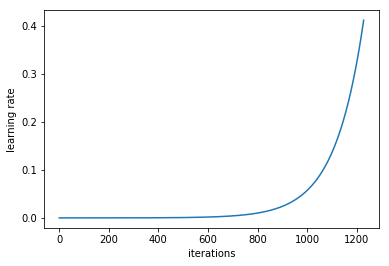

In [15]:
learn.sched.plot_lr()

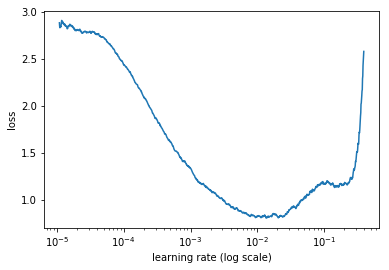

In [16]:
learn.sched.plot()

In [17]:
tfms = tfms_from_model(resnet34, size, aug_tfms=transforms_side_on, max_zoom=1.1)

In [18]:
size = 28
arch = resnet34
data = ImageClassifierData.from_arrays(
    "data/fashionmnist/", 
    trn=tuple([train_X, train_y]),
    val=tuple([validation_X, validation_y]),
    tfms=tfms,
    classes=set(test_y),
    bs=32, 
    test=test_X
)

In [19]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 10)

100%|██████████| 282/282 [00:04<00:00, 65.63it/s]


epoch      trn_loss   val_loss   accuracy                       
    0      0.580512   0.465126   0.837556  
    1      0.497329   0.463306   0.839889                       
    2      0.555241   0.414251   0.848778                       
    3      0.526912   0.412707   0.852667                       
    4      0.491067   0.395959   0.858667                       
    5      0.457398   0.386646   0.86                           
    6      0.431058   0.38061    0.863222                       
    7      0.45478    0.380842   0.862222                       
    8      0.440562   0.376794   0.862556                       
    9      0.456159   0.369852   0.867333                       


[array([0.36985]), 0.8673333333333333]

In [20]:
learn.precompute=False
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                      
    0      0.524136   0.382215   0.861222  
    1      0.532705   0.377753   0.864111                      
    2      0.512376   0.380378   0.861556                      


[array([0.38038]), 0.8615555555555555]

In [21]:
learn.save('224_lastlayer')
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                      
    0      0.490469   0.371639   0.865111  
    1      0.399461   0.311133   0.886333                      
    2      0.330813   0.282002   0.895778                      
    3      0.318453   0.266452   0.902333                      
    4      0.348005   0.268303   0.901                         
    5      0.31447    0.252757   0.906333                      
    6      0.26912    0.229786   0.916                         
    7      0.268277   0.226809   0.916667                      
    8      0.239059   0.223856   0.920778                      
    9      0.238553   0.215091   0.920778                      
    10     0.23491    0.214822   0.922444                      
    11     0.214462   0.212613   0.922889                      
    12     0.224845   0.211652   0.922667                      


[array([0.21165]), 0.9226666666666666]

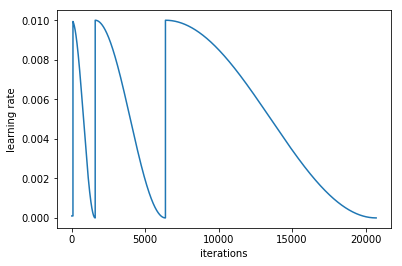

In [22]:
learn.sched.plot_lr()
learn.save('224_all')
learn.load('224_all')